In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Oxfam_Dataset.csv")

In [2]:
data.sample(10)

,Type,Colour,Brand,Exact Colour,Title,Img name,Img src
36161,NaN,Blue,Unbranded,NaN,NaN,HD_101769479_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
24609,Blouse,Multi-coloured,Zara,NaN,NaN,HD_101802721_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
10381,Calf length skirt,Multi-coloured,Fashion Union,NaN,NaN,HD_101887839_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
23258,NaN,Black,Lewis Henry,Black,NaN,HD_101816108_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
1929,Tie,Blue,Berkertex,Blue,Berkertex Tie Blue Size: One size,HD_200016070_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
36483,NaN,Pink,tfnc london,Coral,NaN,HD_101528131_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
8867,Jacket,Brown,M&amp;S Marks &amp; Spencer,Brown,NaN,HD_101475431_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
22799,Knee length dress,Blue,Next,NaN,NaN,HD_101819643_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
16912,Calf length,Metallics,Per Una,Pewter,NaN,HD_101863980_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...
5964,Cuff Links,Cream / ivory,Unbranded,Cream Black,NaN,HD_101743143_01.jpg?v=1,https://yatra8exe7uvportalprd.blob.core.window...


In [3]:
data = data.drop(columns=['Img src'])

In [4]:
data.isna().sum()

Type            14080
Colour            634
Brand             121
Exact Colour    19892
Title           34049
Img name            0
dtype: int64

In [5]:
data.Type.unique()

array(['Cardigan', nan, 'Other', 'Full length dress', 'Parka',
       'Quilted jacket', 'Coat', 'Jacket', 'Hoodie', 'Long dress',
       'Summer', 'Calf length', 'Sleeveless', 'Fleece jacket',
       'School uniform', 'Leotard', 'Jeans', 'Dress /  gown',
       'Body warmer', 'Tracksuit top', 'Knee length dress',
       'Long sleeved shirt', 'Gilet', 'Wetsuit', 'Vintage', 'Jumper',
       'Sleeveless top', 'Evening dress', 'Trainers', 'Slip-on shoes',
       'Bikini', 'Trousers', 'Denim jacket', 'T-Shirt', 'Raincoat',
       'Prom dress', 'Smock top', 'Polo shirt', 'One piece', 'Sweater',
       'Boots', 'Knee length skirt', 'Bomber jacket', 'Mini skirt',
       'Casual jacket / coat', 'Flat shoes', 'Hot pants', 'Trenchcoat',
       'Patterned skirt', 'Leather jacket', 'Vest', 'Cargo pants',
       'Jeggings / stretch trousers', 'Cropped trousers', 'Ballet',
       'Blouse', 'Checked skirt', 'Short', 'Smock', 'Short sleeved shirt',
       'Hooded top', 'Mini dress', 'Jeggings / stretch

In [6]:
lstToDel = ['Summer', 'School uniform', 'Leotard', 'Body warmer', 'Wetsuit', 'Slip-on shoes', 
            'Bikini', 'Prom dress', 'Boots', 'Flat shoes', 'Ballet', 'Sandals', 'Dance shoes', 
            'All in one', 'Pyjamas', 'Deck shoes', 'Football socks', 'Plimsolls', 'Tie', 'Scarf', 
            'Chelsea / ankle boots', 'Lace-ups', 'Work boots', 'Wallet', 'Cowboy hat', 
            'Walking, hiking &amp; trail', 'Football', 'Belt', 'Loafers', 'Beanie', 'Rugby top', 
            'Manbag', 'Brogue', 'Baseball shoes', 'Slipper shoes', 'Ski suit', 'Cross body bag', 
            'Bow tie', 'Mittens', 'Moccasisns', 'Sports Wristwatch', 'digital watch', 
            'Weekend Bag', 'Cuff links', 'Running shoes', 'Baseball cap', 'Briefs', 'Cravat', 
            'Rucksack', 'Flip flops', '43924', 'Skate shoes', 'Peaked cap', 'Driving gloves', 
            'Slip ons', 'Bowler hat', 'Cuff links', 'Outfit', 'Biker boots', 'Bush hat', 
            'Coin purse', 'Woolie hat', 'Boxers', 'Gloves', 'Cuff Links', 'Robe', 'Desert boots', 
            'Tie Pin', 'Snow &amp; winter boots', 'Trilby', 'Wrist watches', 'Backpack', 
            'College scarf', 'Trunks', 'Golf shoes', 'Tablewear', 'Make up bag', 'Board', 
            'Salopettes', 'Strapped sandals', 'Motorcycle trousers', 'Sports sandals', 
            'Sports gloves', 'Cowboy boots', 'Hiking trousers', 'Mixed items', 'Kilt', 
            'Sunglasses', 'Cuff link', 'Ascot', 'Laptop bag', 'Briefcase', 'Swimming shorts', 
            'Smokers pipes', 'Cuff-Links', 'Long / riding boots', 'Rugby', 'Cufflinks', 'Purse', 
            'Handbag', 'Tote bag', 'Shoulder bag', 'Heeled shoes', 'Clutch bag', 'Necklace', 
            'Mini bag', 'Ladies dress watch', 'Basque', 'Lace-up shoes', 'Silver ring', 
            'Court shoes', 'Batwing top', 'Slingbacks', 'Pendant', 'Chain', 'Evening gloves', 
            'Mules', 'Top handle bag', 'Grab bag', 'Fascinator', 'Shopper bag', 'Bustier', 'Bra', 
            'Ladies bracelet wristwatch', 'Ladies wistwatch', 'Watch', 'Shrug', 'Bolero', 
            'Pashmina', 'Messenger bag', 'Wedding dress', 'Ring', 'Peep toe shoes', 
            'Full skirt wedding dress', 'Tube', 'Nighty', 'Boob tube', 'Brogues', 'Slippers', 
            'Baguette handbag', 'Corset', 'Shawl', 'Wedding hat', 'Hobo bag', 'Ladies wristwatch', 
            'Sac', 'Wristwatch', 'Weekend bag', 'Chemise', 'Wristwatch &amp; Bracelet', 'Balaclava', 
            'Pedal pushers', 'Babydoll', 'watch', 'Analogue', 'Catsuit', 'Quartz Dress/Fashion', 
            'Quartz Watch', 'Gold coloured quartz watch', 'Panama', 'Kimono', 'Cosmetic bag', 
            'Jodhpurs', 'Dress Watch', 'wristwatch', 'Handmade Enamel Costume Ring', 'Cape', 
            'ladies wristwatch', 'Thong', 'Hats', 'Shoes', 'Wrist watch', 'Bracelet', 'Suitcase', 
            'One piece', 'Cuff Links ', 'Cuff-Links ', 'Football top', 'Cuff-Links', 'Ski trousers', 
            'Suit / outfit', 'Long bottoms', 'Tracksuit', 'Parachute pants', '.', 'High waist', 
            'Tail coat suit', 'Double breasted dinner suit', 'Camisole', 'Poncho', 
            'Long skirt / trousers', 'Moccasins', 'Tail coat suit jacket', 'Surf shorts', 
            'Handkerchief skirt', '3 piece skirt suit', 'Shorts', 'Dressing gown', 
            'Double breasted suit', 'Sporty shorts', '3 piece suit', '3/4', 'Halter-neck top', 
            'Halter-neck', 'Single breasted dinner suit', 'Trouser suit', 'Single breasted suit', 
            '3 piece trouser suit', 'Vintage', 'Trainers', 'Other', 'Not Specified', 
            'Tracksuit top', 'Tracksuit bottoms', 'Not specified']

In [7]:
before = data.Type.unique()
beforeLen = len(before)
print("Number of unique values in 'Type' before: ", beforeLen)

data = data[~data.Type.isin(lstToDel)]

after = data.Type.unique()
afterLen = len(after)
print("Number of unique values in 'Type' after: ", afterLen)

difference = beforeLen - afterLen
print("Difference is: ", difference)

Number of unique values in 'Type' before:  321
Number of unique values in 'Type' after:  112
Difference is:  209


In [8]:
data.Type.unique()

array(['Cardigan', nan, 'Full length dress', 'Parka', 'Quilted jacket',
       'Coat', 'Jacket', 'Hoodie', 'Long dress', 'Calf length',
       'Sleeveless', 'Fleece jacket', 'Jeans', 'Dress /  gown',
       'Knee length dress', 'Long sleeved shirt', 'Gilet', 'Jumper',
       'Sleeveless top', 'Evening dress', 'Trousers', 'Denim jacket',
       'T-Shirt', 'Raincoat', 'Smock top', 'Polo shirt', 'Sweater',
       'Knee length skirt', 'Bomber jacket', 'Mini skirt',
       'Casual jacket / coat', 'Hot pants', 'Trenchcoat',
       'Patterned skirt', 'Leather jacket', 'Vest', 'Cargo pants',
       'Jeggings / stretch trousers', 'Cropped trousers', 'Blouse',
       'Checked skirt', 'Short', 'Smock', 'Short sleeved shirt',
       'Hooded top', 'Mini dress', 'Jeggings / stretch jeans',
       'Pleated skirt', 'Gypsy skirt', 'Quilted coat', 'A-line skirt',
       'Overcoat', 'Strapless dress', 'Padded jacket',
       'Single breasted blazer', 'Long sleeved', 'Sweatshirt', 'Pullover',
       'Hiki

In [9]:
data.Type.value_counts()

Jacket                         1713
Trousers                       1501
Knee length dress              1264
Smart jacket / coat            1147
Long sleeved                    988
Casual jacket / coat            932
Sleeveless                      852
Jumper                          674
Blouse                          669
Jeans                           592
Single breasted suit jacket     575
Long sleeved shirt              567
Cardigan                        486
Mini dress                      466
Cocktail dress                  462
Sleeveless top                  402
Knee length skirt               401
T-Shirt                         394
Short                           357
Long dress                      354
Calf length                     347
Evening dress                   327
Strapless dress                 324
Mini skirt                      246
Calf length skirt               245
Evening                         228
Single breasted blazer          219
Short sleeved shirt         

In [10]:
counts = data.Type.value_counts().to_frame()
with pd.option_context('display.max_rows', 200):
    print (counts)

                             Type
Jacket                       1713
Trousers                     1501
Knee length dress            1264
Smart jacket / coat          1147
Long sleeved                  988
Casual jacket / coat          932
Sleeveless                    852
Jumper                        674
Blouse                        669
Jeans                         592
Single breasted suit jacket   575
Long sleeved shirt            567
Cardigan                      486
Mini dress                    466
Cocktail dress                462
Sleeveless top                402
Knee length skirt             401
T-Shirt                       394
Short                         357
Long dress                    354
Calf length                   347
Evening dress                 327
Strapless dress               324
Mini skirt                    246
Calf length skirt             245
Evening                       228
Single breasted blazer        219
Short sleeved shirt           214
Full length dr

In [11]:
replaceDict = {"Flared / kick flare jeans": "Jeans",
               "Tank top": "Top",
               "Hi tops": "Top",
               "Boiler suit": "Jumpsuit",
               "Waxed coat": "Coat",
               "Waxed jacket": "Jacket",
               "Tulip skirt": "Skirt",
               "Puffball skirt": "Skirt",
               "Tweed jacket": "Jacket",
               "Fleece jackets": "Jacket",
               "PVC trousers": "Trousers",
               "Short jacket": "Jacket",
               "Hooded top": "Hoodie",
               "Duffle coat": "Coat",
               "Combats": "Trousers",
               "Parka": "Jacket",
               "Harem pants": "Pants",
               "Quilted coat": "Coat",
               "Culottes": "Trousers",
               "Leather coat": "Coat",
               "Checked skirt": "Skirt",
               "Cropped jeans": "Jeans",
               "Vintage skirt": "Skirt",
               "Double breasted blazer": "Blazer",
               "Wrap around": "Dress",
               "Gypsy skirt": "Skirt",
               "Leather trousers": "Trousers",
               "Jeggings / stretch jeans": "Jeggings",
               "Denim jacket": "Jacket",
               "Fleece jacket": "Jacket",
               "Sports top": "Top",
               "Hiking jacket": "Jacket",
               "Wraparound top": "Top",
               "Jeggings / stretch trousers": "Jeggings",
               "Quilted jacket": "Jacket",
               "Cap sleeved T-shirt": "T-shirt",
               "Suit jacket": "Jacket",
               "Wrap around dress": "Dress",
               "Double breasted suit jacket": "Jacket",
               "Pullover": "Sweater",
               "Denim jeans": "Jeans",
               "Patterned skirt": "Skirt",
               "Padded jacket": "Jacket",
               "Pleated skirt": "Skirt",
               "Playsuit": "Jumpsuit",
               "Dress /  gown": "Dress",
               "Single breasted blazer": "Blazer",
               "Long sleeved": "Long sleeved shirt",
               "Single breasted suit jacket": "Jacket",
               "Calf length": "Calf length dress",
               "Evening": "Evening dress",
               "Short sleeved": "Short sleeved shirt",
               "A-line skirt": "Skirt",
               "Full length": "Full length dress",
               "Halter-neck dress": "Dress",
               "Asymmetrical dress": "Dress",
               "Hot pants": "Pants",
               "Sweat pants": "Pants",
               "T-shirt": "T-Shirt"
}

In [12]:
for key, val in replaceDict.items():
    data['Type'] = data['Type'].replace(to_replace = key, value = val)

In [13]:
data.Type.value_counts()

Jacket                   2552
Long sleeved shirt       1555
Trousers                 1540
Knee length dress        1264
Smart jacket / coat      1147
Casual jacket / coat      932
Sleeveless                852
Jumper                    674
Blouse                    669
Jeans                     658
Evening dress             555
Cardigan                  486
Mini dress                466
Cocktail dress            462
Short sleeved shirt       416
Sleeveless top            402
Knee length skirt         401
T-Shirt                   394
Short                     357
Long dress                354
Calf length dress         347
Strapless dress           324
Skirt                     303
Blazer                    302
Dress                     298
Full length dress         282
Mini skirt                246
Calf length skirt         245
Pencil skirt              205
Coat                      182
Raincoat                  178
Sweater                   169
Long skirt                150
Polo shirt

In [14]:
len(data.Type.unique())

60

In [15]:
data.isna().sum()

Type            14080
Colour            612
Brand              80
Exact Colour    17306
Title           29422
Img name            0
dtype: int64

In [16]:
data[data['Colour'].isna()]

,Type,Colour,Brand,Exact Colour,Title,Img name
17,NaN,NaN,M&amp;S Kids,Pink,M&amp;S Kids Hello Kitty Zipped Hoodie Pink Si...,HD_200025544_01.jpg?v=1
96,Cardigan,NaN,Unbranded Hand Knit,Lilac,Unbranded Hand Knit Cardigan Lilac Size: 2 - ...,HD_200016415_01.jpg?v=1
100,NaN,NaN,New Look,Blue,New Look Jacket Blue Size: 12 - 13 Years,HD_200015945_01.jpg?v=1
111,NaN,NaN,Monsoon,White,Monsoon Dress White Size: 8-9,HD_200015135_01.jpg?v=1
112,NaN,NaN,DK House,Pink,DK House Dress Pink Size: 90,HD_200015133_01.jpg?v=1
113,NaN,NaN,H&amp;M,Black,H&amp;M Jacket Black Size: 12-13Y,HD_200015118_01.jpg?v=1
169,NaN,NaN,M&amp;S Marks &amp; Spencer,red,M&amp;S knitted dress red Size: 2 - 3 Years,HD_200010604_01.jpg?v=1
474,NaN,NaN,M&amp;S Marks &amp; Spencer,Blue,M&amp;S Marks &amp; Spencer School Blazer Blue...,HD_200028259_01.jpg?v=1
528,NaN,NaN,Converse All star,Green,Converse All star Hoodie Green Size: 12 - 13 Y...,HD_200015941_01.jpg?v=1
544,NaN,NaN,M&amp;S Marks &amp; Spencer,Black,M&amp;S School Leather School Shoes Black Siz...,HD_200013477_01.jpg?v=1


In [17]:
data.Colour.fillna(data['Exact Colour'], inplace=True)
data[data['Colour'].isna()]

,Type,Colour,Brand,Exact Colour,Title,Img name
9226,NaN,NaN,Unbranded,NaN,Gold tone costume necklace,HD_200029074_01.jpg?v=1
9530,NaN,NaN,NaN,NaN,"Dior purple, pink &amp; green butterfly patter...",HD_200028352_01.jpg?v=1
9606,NaN,NaN,NaN,NaN,Frank Morello Black Leather Studded Belt,HD_200028221_01.jpg?v=1
9720,NaN,NaN,NaN,NaN,Red Velvet hat with Black Bow,HD_200028059_01.jpg?v=1
9774,NaN,NaN,NaN,NaN,Swarovski Crystal Bracelet,HD_200027961_01.jpg?v=1
9777,NaN,NaN,NaN,NaN,Two gold tone bracelets,HD_200027955_01.jpg?v=1
9796,NaN,NaN,NaN,NaN,Monet watch with multiple straps,HD_200027915_01.jpg?v=1
10651,NaN,NaN,Other,NaN,Pepe Jeans London Perfume and Body Lotion Set,HD_200025446_01.jpg?v=1
10755,NaN,NaN,Unbranded,NaN,Ultra-Sparkly Floral Brooch,HD_200025241_01.jpg?v=1
11110,NaN,NaN,NaN,NaN,Sterling Silver 925 Ring by Hans Henrik Nygaard,HD_200024065_01.jpg?v=1


In [18]:
data.isna().sum()

Type            14080
Colour             32
Brand              80
Exact Colour    17306
Title           29422
Img name            0
dtype: int64

In [19]:
data = data[data['Colour'].notna()]
data.isna().sum()

Type            14048
Colour              0
Brand              57
Exact Colour    17274
Title           29421
Img name            0
dtype: int64

In [20]:
data[data['Brand'].isna()]

,Type,Colour,Brand,Exact Colour,Title,Img name
2131,NaN,Grey,NaN,NaN,NaN,HD_200014675_01.jpg?v=1
2193,NaN,Silver,NaN,NaN,Sterling silver set of cuff links and tie pin,HD_200014145_01.jpg?v=1
3406,NaN,Metallics,NaN,NaN,2 Pairs of Cuff Links,HD_200008857_01.jpg?v=1
9263,NaN,Red,NaN,NaN,NWOT Marks &amp; Spencer 2 Thin Leather Belts ...,HD_200028991_01.jpg?v=1
9271,NaN,Red,NaN,NaN,NWOT Marks &amp; Spencer 2 Thin Leather Belts ...,HD_200028976_01.jpg?v=1
9429,NaN,Multi-coloured,NaN,NaN,New Poppy multicoloured rectangular scarf,HD_200028506_01.jpg?v=1
9941,NaN,Metallics,NaN,NaN,Silver Bracelet,HD_200027517_01.jpg?v=1
9942,NaN,Metallics,NaN,NaN,Silver engraved hinged bangle,HD_200027510_01.jpg?v=1
10077,NaN,Red,NaN,NaN,BURGUNDY KOKO WIG LONG BOB WITH FRINGE,HD_200027017_01.jpg?v=1
10078,NaN,Cream,NaN,NaN,BLONDE KOKO WIG LONG HIGHLIGHTED BOB WITH CENT...,HD_200027028_01.jpg?v=1


In [21]:
data = data[data['Brand'].notna()]

In [22]:
data.isna().sum()

Type            13991
Colour              0
Brand               0
Exact Colour    17219
Title           29418
Img name            0
dtype: int64

In [23]:
data = data.dropna(subset=["Type", "Title"], how='all')
data.isna().sum()

Type             2350
Colour              0
Brand               0
Exact Colour     8939
Title           17777
Img name            0
dtype: int64

In [24]:
data[data['Type'].isna()]

,Type,Colour,Brand,Exact Colour,Title,Img name
1,NaN,Pink,Patagonia,Pink and Yellow,Patagonia Rain Coat Pink and Yellow Size: S,HD_200022754_01.jpg?v=1
2,NaN,Multi-coloured,Sidewalk Sports,Black/Pink,Sidewalk Sports Wheeled Trainers Black/Pink Si...,HD_200027757_01.jpg?v=1
4,NaN,Grey,Alpinestars,NaN,Alpinestars Biker jacket blue Size: S,HD_200027000_01.jpg?v=1
5,NaN,Pink,Shredz,Pink,Shredz Ski Trousers Pink Size: 14 - 15 Years,HD_200027087_01.jpg?v=1
7,NaN,Purple,Trespass,Purple,Trespass Kids Ski Trousers Purple Size: 5 - 6 ...,HD_200026907_01.jpg?v=1
10,NaN,Red,Gap,Red,Gap Polka Dot Top Red Size: 12 - 13 Years,HD_200026539_01.jpg?v=1
11,NaN,Brown,Miss Evie,Brown,Miss Evie Faux Suede Jacket Brown Size: 12 - 1...,HD_200026403_01.jpg?v=1
12,NaN,Red,Other,NaN,BNWT Hudson's Bay Olympics Youth Red Mittens,HD_200025698_01.jpg?v=1
17,NaN,Pink,M&amp;S Kids,Pink,M&amp;S Kids Hello Kitty Zipped Hoodie Pink Si...,HD_200025544_01.jpg?v=1
19,NaN,Red,M&amp;S Girls,Red,M&amp;S Girls Cashmere Dress with Sequin Bow R...,HD_200024851_01.jpg?v=1


In [25]:
subsetOfItemsToRemove = ['Shoe', 'Tie', 'Ski Trouser', 'Trainer', 'Scarf', 'Links', 'Mittens', 'Loafer', 'Slipper', 
                         'Sandal', 'Bag', 'Bracelet', 'Belt', 'Boot', 'slip on', 'Watch', 'Pumps', 'glasses', 
                         'Chain', 'suit', 'Salopettes', "Gloves", "Cap", "Gaiters", "Handkerchief", "Joggers", 
                         "Brogues", "Pouch", "Heels", "Earrings", "Pyjamas", "Beige", "Poncho", "Purse", "Necklace", 
                         "Mules", "Stilettoes", "Parka", "Gown", "Ring", "Hat", "Brooch", "Bra", "Uniform", "Heel"]

for item in subsetOfItemsToRemove:
    data = data[~data.Title.str.contains(item, na=False, flags=re.IGNORECASE)]
    
data.isna().sum()

Type             1442
Colour              0
Brand               0
Exact Colour     8841
Title           17777
Img name            0
dtype: int64

In [26]:
lst = ["Evening dress", "Long dress", "Full length dress", "Overcoat", "Trenchcoat", "Long sleeved T-shirt","Leggings", 
       "Gilet", "Raincoat", "Sweatshirt", "Waistcoat", "Full length dress", "Sleeveless", "Knee length dress", "Sweater", 
       "Hoodie", "Smock", "Chinos", "T-Shirt", "Cardigan", "Trousers", "Pants", "Dress", "Skirt", "Shirt", "Vest", "Blazer", 
       "Coat", "Top", "Short", "Jeans", "Blouse", "Jumper", "Jacket"]

dataCopy = data[data['Type'].isna()]

for item in lst:
    idxLst = dataCopy[dataCopy.Title.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[idxLst, 'Type'] = item

data.isna().sum()

Type               56
Colour              0
Brand               0
Exact Colour     8841
Title           17777
Img name            0
dtype: int64

In [27]:
data[data['Type'].isna()]

,Type,Colour,Brand,Exact Colour,Title,Img name
1326,NaN,Black,Berik,Black &amp; Silver,Berik Original One Race Leathers - Collectio...,HD_200021320_01.jpg?v=1
1529,NaN,Grey,Bermans &amp; Nathans,Grey,Bermans &amp; Nathans Der Freischutz Costume G...,HD_200020662_01.jpg?v=1
2544,NaN,Grey Mix,Alex Dalgety &amp; Son,Grey Mix,Alex Dalgety &amp; Son Highland Tartan Argyll ...,HD_200012513_01.jpg?v=1
2696,NaN,charcoal,Animal onesie,charcoal,Animal onesie charcoal Size: L,HD_200011206_01.jpg?v=1
3052,NaN,Black,BNWT Russell,Black,BNWT Russell Russell Intelligent Clothing Bla...,HD_200010626_01.jpg?v=1
3079,NaN,Grey,Converse All Star,grey,Converse All Star low canvas lace ups grey Siz...,HD_200010494_01.jpg?v=1
5336,NaN,mink,Gant,mink,"Gant straight leg mink Size: 38""",HD_200000378_01.jpg?v=1
9238,NaN,White,Unbranded,NaN,White gold 9 carat,HD_200029031_01.jpg?v=1
9247,NaN,Cream / ivory,Jaeger,Cream,Jaeger Cashmere Roll Neck Cream Size: 10,HD_200029000_01.jpg?v=1
9337,NaN,Green,All Saints,Khaki,All Saints Lightweight Trench Khaki Size: 8,HD_200028747_01.jpg?v=1


In [28]:
data = data[data['Type'].notna()]

In [29]:
data.isna().sum()

Type                0
Colour              0
Brand               0
Exact Colour     8829
Title           17777
Img name            0
dtype: int64

In [30]:
data.Colour.value_counts()

Black                 4745
Blue                  3819
Grey                  2333
Multi-coloured        2114
Brown                 1500
Pink                  1349
Green                 1077
White                  950
Red                    895
Purple                 887
Beige                  844
Cream / ivory          794
Orange                 302
Metallics              252
Yellow                 190
Cream                   19
Denim                   14
Burgundy                11
Navy                     8
black                    8
Multicoloured            6
Bronze                   5
Black &amp; White        4
Black and White          4
Multi coloured           4
Dark Grey                4
grey                     4
blue                     4
Gold                     3
Navy Blue                3
                      ... 
Bright Red               1
Chocolate brown          1
Lemon                    1
PURPLE/WHITE             1
Black and Red            1
Black &amp; Red          1
p

In [31]:
subsetOfItemsToRemove = ["striped ", "checked", "Leopard Print", "Not specified", "Tweed", "Wool", "Turquoise", "Colour",
                         "Olive", "Teal", "Peach", "Putty", "Khaki", "Stone", "Taupe", "Oyster", "Cerise", "Coral", "Aqua"]

for item in subsetOfItemsToRemove:
    data = data[~data.Colour.str.contains(item, na=False, flags=re.IGNORECASE)]

In [32]:
data.Colour.value_counts()

Black                  4745
Blue                   3819
Grey                   2333
Brown                  1500
Pink                   1349
Green                  1077
White                   950
Red                     895
Purple                  887
Beige                   844
Cream / ivory           794
Orange                  302
Metallics               252
Yellow                  190
Cream                    19
Denim                    14
Burgundy                 11
black                     8
Navy                      8
Bronze                    5
Black &amp; White         4
blue                      4
Dark Grey                 4
Black and White           4
grey                      4
Blue and White            3
Silver                    3
Gold                      3
Navy Blue                 3
red                       2
                       ... 
Blush Pink                1
WHITE/NAVY                1
PURPLE/WHITE              1
Black &amp; Ivory         1
Mustard Yellow      

In [33]:
colourLstBefore = ["Cream / ivory", "amp;", "/", "and", "Multi", "Mutli", "Silver", "Gold", "Bronze", "Metallic", "Black", 
                   "Blue", "Grey", "Brown", "Pink", "Green", "White", "Cream", "Purple", "Red", "Lemon", "Navy", "Mustard", 
                   "Denim", "Plum", "Bleu", "Indigo", "Lilac", "Burgundy", "Merlot", "Camel"]

colourLstAfter = ["Cream", "Multi-coloured", "Multi-coloured", "Multi-coloured", "Multi-coloured", "Multi-coloured", 
                  "Metallics", "Metallics", "Metallics", "Metallics", "Black", "Blue", "Grey", "Brown", "Pink", "Green", 
                  "White", "Cream", "Purple", "Red", "Green", "Blue", "Yellow", "Blue", "Purple", "Blue", "Blue", "Blue", 
                  "Red", "Red", "Brown"]

for index, item in enumerate(colourLstBefore):
    rowIDs = data[data.Colour.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[rowIDs, 'Colour'] = colourLstAfter[index]

In [34]:
data.Colour.value_counts()

Black        4755
Blue         3864
Grey         2345
Brown        1506
Pink         1354
Green        1082
Red           978
White         951
Purple        890
Beige         844
Cream         816
Orange        302
Metallics     266
Yellow        192
Name: Colour, dtype: int64

In [35]:
data.Brand.value_counts()

M&amp;S Marks &amp; Spencer       2208
Next                               455
Per Una                            364
Unbranded                          346
Ted Baker                          303
Monsoon                            257
ASOS                               247
Jaeger                             222
Coast                              208
Laura Ashley                       199
River Island                       187
Karen Millen                       183
H&amp;M                            175
Zara                               154
Topshop                            142
Hobbs                              133
Phase Eight                        131
Boden                              131
Gap                                123
French Connection                  119
Ralph Lauren                       115
Reiss                              114
Debenhams                          113
M&amp;S Collection                 102
Warehouse                          102
Burberry                 

In [36]:
brandChangeToUnknown = ["AZARA", "Velvet by Graham &amp; Spencer", "East Coast", "Green Coast", "North Coast", 
                        "Tadashi Collection", "Kardashian Kollection for Lipsy", "Dolce Vita", "Big Star", "Arrogant", 
                        "Handmade", "Jacques Britt", "Jacques Sac", "Mylene Klass", "Oaklands", "Rowlands", "Urban Landscape", 
                        "Larry Levine", "Miss levi", "Tahari Arthur S.Levine", "Tahari, Arthur S Levine", "Linea Raffaelli", 
                        "Linea Tesini", "axcess (a Claiborne company)", "Kim &amp; Co", "Love Mango Basic", "Monsoon Fusion", 
                        "Kiwistuff", "Vilagallo", "Vila Joy", "J. Toyner Eromann", "Roman Carter"]

for item in brandChangeToUnknown:
    rowIDs = data[data.Brand.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[rowIDs, 'Brand'] = "Unknown"

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [37]:
brandLstBefore = ["M&amp;S", "M &amp; S", "M and S", "Marks &amp; Spencer", "Unbranded", "H&amp;M", "Armani", "Calvin", 
                  "Laura Ashley", "Jack &amp; Jones", "Marks and Spencer", "Abercombie", "Abercrombie", "Abercrombe", "Zara", 
                  "Dominguez", "Adolfo", "Adidas", "All Saints", "allsaints", "Apricot", "Aquascutum", "ASOS", "Atmosphere", 
                  "Austin Reed", "Autograph", "AX Paris", "AX (Paris)", "Ax, Paris", "Banana", "Barbour", "Ben Sherman", 
                  "Bench", "Benetton", "Betty Barclay", "Betty Jackson", "BHS", "Biba", "Boden", "Boohoo", "Brook Taverner", 
                  "Burberry", "Burton", "Charles Tyrwhitt", "Coast", "Country Casuals", "Cotton Traders", "Daks", "Damart", 
                  "Daniel Hechter", "Daniel Hetcher", "Dannimac", "Dash", "Debenhams", "Debut", "Début", "Furstenberg", 
                  "Diane Von", "Diesel", "DKNY", "Karan", "Gabbana", "Dolce", "Dorothy Perkins", "Eastex", "Edina Ronay", 
                  "Edinburgh", "Escada", "Evans", "EWM", "F&amp;F", "F &amp; F", "F + F", "F+F", "Fat Face", "FatFace", 
                  "Fenn", "Fire Trap", "Forever 21", "Frank Usher", "French Connection", "G Star", "G-Star", "Gant", "Darel", 
                  "Weber", "Bacconi", "Glamorous", "Great Plains", "Guess", "Hobbs", "Hollister", "Hugo Boss", "J Crew", 
                  "J. Crew", "J.Crew", "Jack Wills", "Jack Willis", "Jackpot", "Jacques", "Jacque's Vert", "Jaeger", "Jaegar", 
                  "Jane Norman", "Jasper", "Jeff Banks", "Jigsaw", "Joe Brown", "John Lewis", "Joule", "scope", "Kaliko", 
                  "Karen Millen", "Kenzo", "Klass", "Kook", "Bennett", "Lands", "Land's", "Levi", "Linea", "Lipsy", 
                  "Little Mistress", "Claiborne", "claibonne", "Sally", "Denim &amp; Co", "Denim CO", "Denim and Co", 
                  "M&amp;Co", "M &amp; Co", "Mango", "Marc Jacobs", "Massimo", "Max Mara", "MaxMara", "Mexx", "Michael K", 
                  "Mint Velvet", "Minuet", "Miss Selfridge", "Miss Sixty", "Missguided", "Monsoon", "n Warehouse", "New Look", 
                  "Next", "Nicole Farhi", "Nike", "Oasis", "Costello", "Paul Smith", "Per Una", "Phase Eight", "Cardin", 
                  "Planet", "Ralph Lauren", "Red Herring", "Regatta", "Reiss", "River Island", "John Rocha", "Sandwich", 
                  "St Michael", "Macdonald", "Superdry", "Lewin", "Ted Baker", "Theory", "Thomas Nash", "Timberland", 
                  "Tommy H", "Topman", "Topshop", "Trespass", "Uniqlo", "all mankind", "Laurent", "Yumi", "Wtoo", "Windsmoor", 
                  "Stuff", "Whistles", "Watters", "Warehouse", "Wallis", "Viyella", "Westwood", "Vila", "Versace", "Vera Moda", 
                  "Sainsbury", "TU Clothing", "Tahari", "Steilmann", "Romantica", "Roman", "Rohan", "Cavalli", "Quiz", "Quick", 
                  "Quik", "Pure Collection", "Pull &amp; Bear", "Pull&amp;Bear", "Pull and Bear", "Principles", "Primark", 
                  "Pretty Little Thing", "Prettylittlething", "Precis", "Prada", "Papaya", "Alex &amp; Co", "Alex and Co"]

brandLstAfter = ["Marks & Spencer", "Marks & Spencer", "Marks & Spencer", "Marks & Spencer", "Unknown", "H&M", "Armani", 
                 "Calvin Klein", "Laura Ashley", "Jack & Jones", "Marks & Spencer", "Abercrombie & Fitch", 
                 "Abercrombie & Fitch", "Abercrombie & Fitch", "Zara", "Adolfo Dominguez", "Adolfo Dominguez", "Adidas", 
                 "All Saints", "All Saints", "Apricot", "Aquascutum", "ASOS", "Atmosphere", "Austin Reed", "Autograph", 
                 "AX Paris", "AX Paris", "AX Paris", "Banana Republic", "Barbour", "Ben Sherman", "Bench", "Benetton", 
                 "Betty Barclay", "Betty Jackson", "BHS", "Biba", "Boden", "Boohoo", "Brook Taverner", "Burberry", "Burton", 
                 "Charles Tyrwhitt", "Coast", "Country Casuals", "Cotton Traders", "Daks", "Damart", "Daniel Hechter", 
                 "Daniel Hechter", "Dannimac", "Dash", "Debenhams", "Debut", "Début", "Diane Von Furstenberg", 
                 "Diane Von Furstenberg", "Diesel", "DKNY", "DKNY", "Dolce & Gabbana", "Dolce & Gabbana", "Dorothy Perkins", 
                 "Eastex", "Edina Ronay", "Edinburgh Woollen Mill", "Escada", "Evans", "EWM", "F&F", "F&F", "F&F", "F&F", 
                 "FatFace", "FatFace", "Fenn Wright Manson", "Firetrap", "Forever 21", "Frank Usher", "French Connection", 
                 "G Star", "G Star", "Gant", "Gerard Darel", "Gerry Weber", "Gina Bacconi", "Glamorous", "Great Plains", 
                 "Guess", "Hobbs", "Hollister", "Hugo Boss", "J. Crew", "J. Crew", "J. Crew", "Jack Wills", "Jack Wills", 
                 "Jackpot", "Jacques Vert", "Jacques Vert", "Jaeger", "Jaeger", "Jane Norman", "Jasper Conran", "Jeff Banks", 
                 "Jigsaw", "Joe Browns", "John Lewis", "Joules", "Kaleidoscope", "Kaliko", "Karen Millen", "Kenzo", "Klass", 
                 "Kookai", "L.K. Bennett", "Lands' End", "Lands' End", "Levi's", "Linea", "Lipsy", "Little Mistress", 
                 "Liz Claiborne", "Liz Claiborne", "Long Tall Sally", "Denim & Co", "Denim & Co", "Denim & Co", "M&Co", "M&Co", 
                 "Mango", "Marc Jacobs", "Massimo Dutti", "Max Mara", "Max Mara", "Mexx", "Michael Kors", "Mint Velvet", 
                 "Minuet", "Miss Selfridge", "Miss Sixty", "Missguided", "Monsoon", "Mountain Warehouse", "New Look", "Next", 
                 "Nicole Farhi", "Nike", "Oasis", "Paul Costelloe", "Paul Smith", "Per Una", "Phase Eight", "Pierre Cardin", 
                 "Planet", "Ralph Lauren", "Red Herring", "Regatta", "Reiss", "River Island", "John Rocha", "Sandwich", 
                 "St Michael", "Julien Macdonald", "Superdry", "T.M.Lewin", "Ted Baker", "Theory", "Thomas Nash", "Timberland", 
                 "Tommy Hilfiger", "Topman", "Topshop", "Trespass", "Uniqlo", "7 For All Mankind", "Yves Saint Laurent", 
                 "Yumi", "Wtoo", "Windsmoor", "White Stuff", "Whistles", "Warehouse", "Watters & Watters", "Wallis", "Viyella", 
                 "Vivienne Westwood", "Vila", "Versace", "Vero Moda", "TU","TU", "Tahari", "Steilmann", "Romantica", "Roman", 
                 "Rohan", "Cavalli", "Quiz", "Quiksilver", "Quiksilver", "Pure Collection", "Pull & Bear", "Pull & Bear", 
                 "Pull & Bear", "Principles", "Primark", "PrettyLittleThing", "PrettyLittleThing", "Precis", "Prada", "Papaya", 
                 "Alex & Co", "Alex & Co"]

for index, item in enumerate(brandLstBefore):
    rowIDs = data[data.Brand.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[rowIDs, 'Brand'] = brandLstAfter[index]

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:57: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [38]:
tuList = ["TU", "TU ", "Tu"]
for i in tuList:
    data['Brand'] = data['Brand'].replace(to_replace = i, value = "TU")

In [39]:
brandDict = (data.Brand.value_counts()).to_dict()

for key, val in brandDict.items():
    if val < 20:
        data['Brand'] = data['Brand'].replace(to_replace = key, value = "Unknown")

In [40]:
data.Brand.value_counts()

Unknown               8041
Marks & Spencer       2441
Next                   475
Per Una                375
Ted Baker              312
ASOS                   299
Monsoon                268
Jaeger                 231
Coast                  214
Zara                   212
Laura Ashley           208
River Island           202
Karen Millen           184
H&M                    183
F&F                    177
Ralph Lauren           167
Watters & Watters      155
Hobbs                  152
Topshop                143
Phase Eight            138
Boden                  138
Armani                 136
French Connection      129
Debenhams              125
Gap                    123
Reiss                  117
Burberry               115
Oasis                  111
New Look               100
Wallis                  99
                      ... 
J. Crew                 27
Guess                   27
George                  27
Jasper Conran           27
Atmosphere              26
Ben Sherman             26
U

In [44]:
data = data.drop(columns=['Exact Colour', "Title"])

In [46]:
data.describe()

,Type,Colour,Brand,Img name
count,20145,20145,20145,20145
unique,59,14,129,20082
top,Jacket,Black,Unknown,HD_101852076_01.jpg?v=1
freq,2633,4755,8041,4


In [47]:
data.to_csv(r'OxfamFinal.csv')

In [54]:
data.Type.value_counts()

Jacket                   2633
Trousers                 1489
Long sleeved shirt       1257
Smart jacket / coat      1066
Knee length dress        1042
Casual jacket / coat      853
Sleeveless                768
Jeans                     681
Jumper                    624
Dress                     611
Evening dress             527
Blouse                    514
Cardigan                  471
Cocktail dress            425
Mini dress                406
Short                     372
Skirt                     354
Knee length skirt         350
Sleeveless top            340
T-Shirt                   339
Short sleeved shirt       338
Blazer                    326
Strapless dress           302
Long dress                298
Calf length dress         292
Coat                      267
Full length dress         244
Calf length skirt         216
Mini skirt                200
Top                       188
Pencil skirt              179
Raincoat                  164
Sweater                   149
Long skirt

In [55]:
data.Colour.value_counts()

Black        4755
Blue         3864
Grey         2345
Brown        1506
Pink         1354
Green        1082
Red           978
White         951
Purple        890
Beige         844
Cream         816
Orange        302
Metallics     266
Yellow        192
Name: Colour, dtype: int64

In [58]:
data.Brand.value_counts()

Unknown               8041
Marks & Spencer       2441
Next                   475
Per Una                375
Ted Baker              312
ASOS                   299
Monsoon                268
Jaeger                 231
Coast                  214
Zara                   212
Laura Ashley           208
River Island           202
Karen Millen           184
H&M                    183
F&F                    177
Ralph Lauren           167
Watters & Watters      155
Hobbs                  152
Topshop                143
Phase Eight            138
Boden                  138
Armani                 136
French Connection      129
Debenhams              125
Gap                    123
Reiss                  117
Burberry               115
Oasis                  111
New Look               100
Wallis                  99
                      ... 
J. Crew                 27
Guess                   27
George                  27
Jasper Conran           27
Atmosphere              26
Ben Sherman             26
U

In [ ]:
data.to_csv(r'OxfamFinal.csv')

In [52]:
cleanData = pd.read_csv("Oxfam_Clean.csv")
cleanData.sample(10)

,Type,Colour,Brand,Img name
11051,Knee length skirt,Grey,Great Plains,HD_101858758_01.jpg
13362,Calf length dress,Green,ASOS,HD_200001152_01.jpg
11723,Calf length dress,Purple,Country Casuals,HD_101870053_01.jpg
1380,Trousers,Grey,Unknown,HD_101479994_01.jpg
1655,Long sleeved shirt,Black,Jasper Conran,HD_101520819_01.jpg
15309,Blouse,Purple,French Connection,HD_200021263_01.jpg
11351,Cardigan,Grey,Fenn Wright Manson,HD_101862646_01.jpg
15902,Raincoat,Black,Regatta,HD_200025474_01.jpg
494,Short sleeved shirt,Beige,Unknown,HD_101255566_01.jpg
4304,Sweater,Brown,Unknown,HD_101724352_01.jpg


In [53]:
cleanData.Type.value_counts()

Jacket                   2069
Trousers                 1025
Smart jacket / coat       943
Long sleeved shirt        931
Knee length dress         930
Casual jacket / coat      751
Sleeveless                692
Jeans                     533
Dress                     513
Jumper                    494
Evening dress             481
Blouse                    428
Cardigan                  392
Cocktail dress            392
Mini dress                374
Short                     343
Skirt                     301
Knee length skirt         301
Sleeveless top            297
Strapless dress           292
Short sleeved shirt       269
Long dress                263
Calf length dress         253
Blazer                    244
Coat                      230
Full length dress         207
T-Shirt                   205
Mini skirt                162
Top                       159
Calf length skirt         151
Raincoat                  142
Pencil skirt              140
Sweater                   120
Polo shirt

In [56]:
cleanData.Colour.value_counts()

Black        4039
Blue         3067
Grey         1874
Brown        1295
Pink         1151
Green         923
Red           796
Purple        788
Beige         697
Cream         662
White         651
Metallics     230
Orange        205
Yellow        165
Name: Colour, dtype: int64

In [57]:
cleanData.Brand.value_counts()

Unknown                7598
Next                    460
Ted Baker               307
ASOS                    295
Per Una                 280
Monsoon                 264
Jaeger                  222
Coast                   210
Zara                    206
River Island            201
Laura Ashley            196
Karen Millen            181
Ralph Lauren            163
Hobbs                   149
F&F                     144
Topshop                 141
Watters & Watters       136
Armani                  132
Boden                   132
French Connection       129
Phase Eight             125
Debenhams               122
Gap                     121
Reiss                   115
Burberry                113
Oasis                   108
New Look                 99
Wallis                   97
Hugo Boss                96
DKNY                     92
                       ... 
Firetrap                 26
Regatta                  25
PrettyLittleThing        25
Linea                    25
Atmosphere          

In [59]:
brandDict = (cleanData.Brand.value_counts()).to_dict()

for key, val in brandDict.items():
    if val < 20:
        cleanData['Brand'] = cleanData['Brand'].replace(to_replace = key, value = "Unknown")

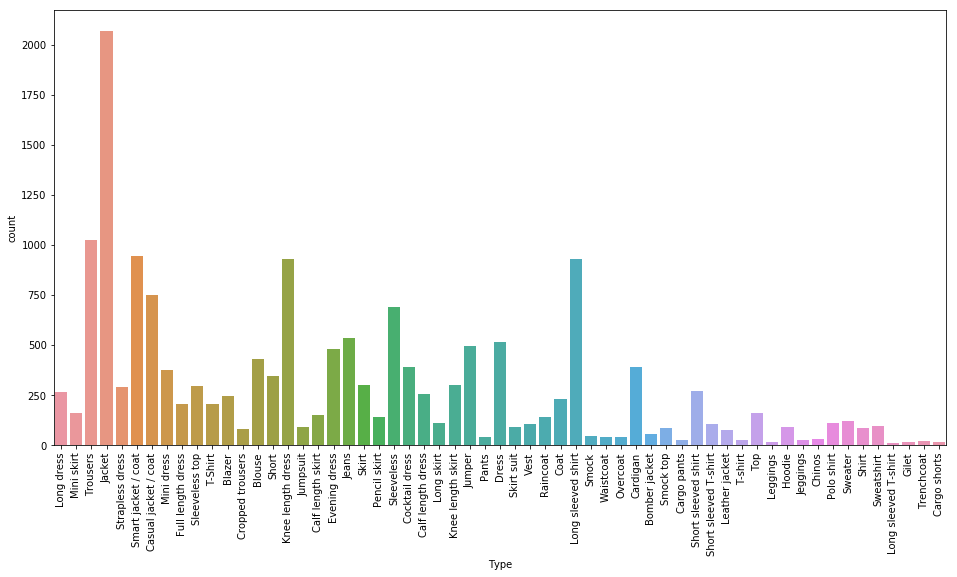

In [60]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=cleanData,
    x='Type'
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

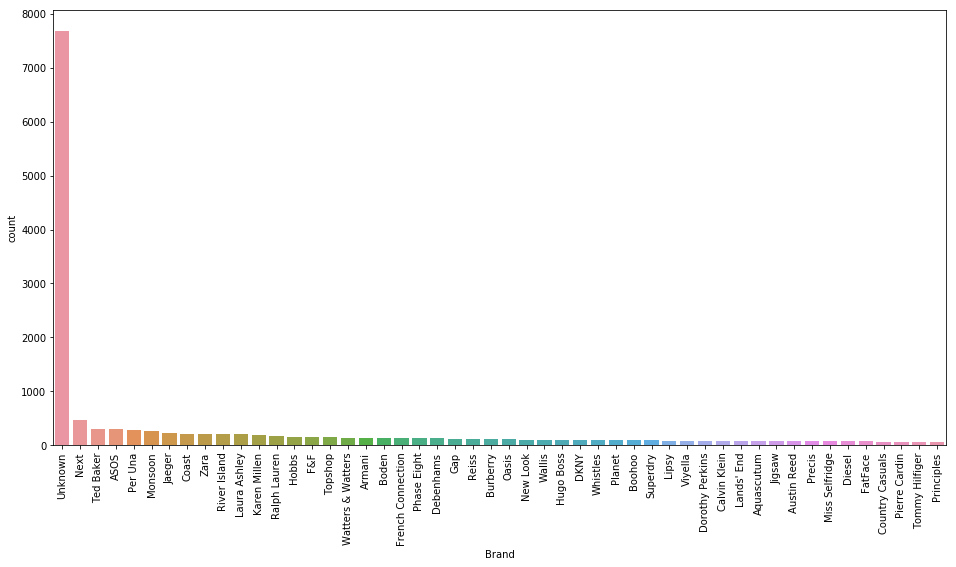

In [61]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=cleanData,
    x='Brand',
    order=cleanData.Brand.value_counts().iloc[:50].index
)


BrandChart.set_xticklabels(BrandChart.get_xticklabels(), rotation=90)
plt.show()

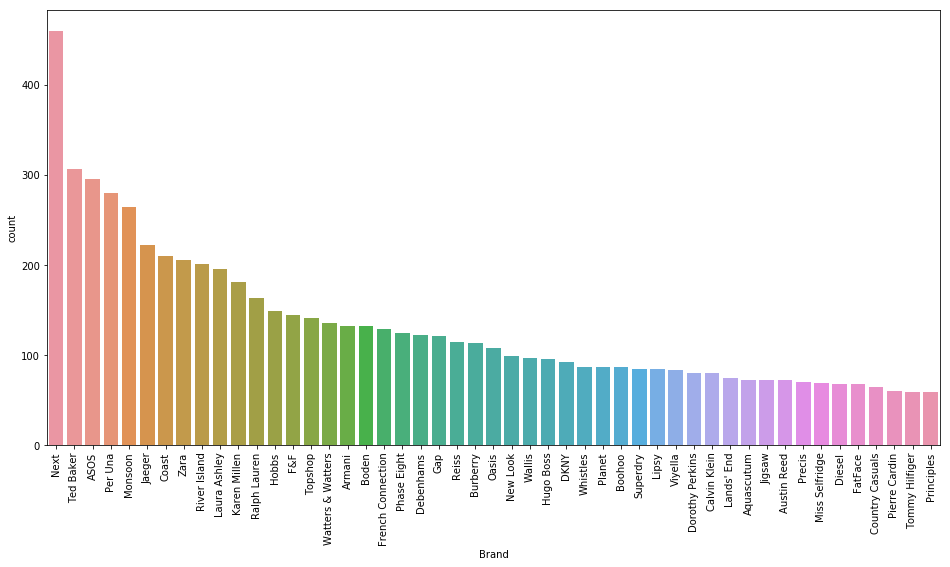

In [62]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=cleanData,
    x='Brand',
    order=cleanData.Brand.value_counts().iloc[1:50].index
)


BrandChart.set_xticklabels(BrandChart.get_xticklabels(), rotation=90)
plt.show()

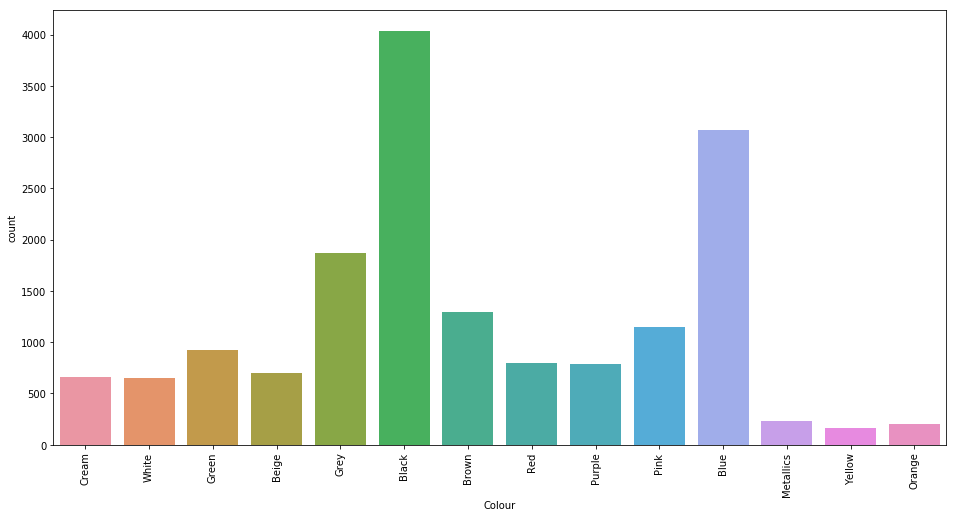

In [63]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=cleanData,
    x='Colour'
)


BrandChart.set_xticklabels(BrandChart.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
data.to_csv(r'OxfamReady.csv')